In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('./data.csv', low_memory=False, sep=';')
# data = pd.read_csv('/content/drive/Othercomputers/My computer/Jupyter/Space_Race/space.csv')
data.sample(2)

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission
863,OneSpace,"Site 95A, Jiuquan Satellite Launch Center, China","Wed Mar 27, 2019 09:39 UTC",NaN,Lingque 1B,Retired,Failure
79,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Fri Dec 29, 2023 04:01 UTC",$67.0 million,Starlink Group 6-36,Active,Success


---

# Prepering data
### Setting years of space race
### Limiting data only to USA and Russia
### Excluding some columns
### Optimizing memory usage 

In [3]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CompanyName    6750 non-null   object
 1   Location       6750 non-null   object
 2   Datum          6710 non-null   object
 3   Price          2700 non-null   object
 4   Rocket         6750 non-null   object
 5   StatusRocket   6750 non-null   object
 6   StatusMission  6750 non-null   object
dtypes: object(7)
memory usage: 3.2 MB


In [4]:
data['Datum']= pd.to_datetime(data['Datum'], format="%a %b %d, %Y %H:%M %Z")

In [5]:
data.head()

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission
0,CASC,"LC-3, Xichang Satellite Launch Center, China",2024-04-20 23:45:00+00:00,$29.75 million,Yaogan 42-02,Active,Success
1,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2024-04-18 22:40:00+00:00,$67.0 million,Starlink Group 6-52,Active,Success
2,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2024-04-17 21:26:00+00:00,$67.0 million,Starlink Group 6-51,Active,Success
3,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2024-04-15 04:12:00+00:00,$29.75 million,SuperView Neo 3-01,Active,Success
4,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2024-04-13 01:40:00+00:00,$67.0 million,Starlink Group 6-49,Active,Success


In [6]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   CompanyName    6750 non-null   object             
 1   Location       6750 non-null   object             
 2   Datum          6710 non-null   datetime64[ns, UTC]
 3   Price          2700 non-null   object             
 4   Rocket         6750 non-null   object             
 5   StatusRocket   6750 non-null   object             
 6   StatusMission  6750 non-null   object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 2.7 MB


In [7]:
data['CompanyName'].value_counts().head()

CompanyName
RVSN USSR       2472
US Air Force     549
CASC             532
Roscosmos        368
SpaceX           348
Name: count, dtype: int64

In [8]:
data['CompanyName'] = data['CompanyName'].astype('category')

In [9]:
data['StatusRocket'] = data['StatusRocket'].astype('category')

In [10]:
data['StatusMission'] = data['StatusMission'].astype('category')

In [11]:
# data['Rocket'] = data['Rocket'].astype('category')

In [12]:
data['Price'] = data.Price.str.replace('$', '').str.replace(' million', '').str.replace(',', '')

In [13]:
data.Price = data.Price.astype('float')

In [14]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   CompanyName    6750 non-null   category           
 1   Location       6750 non-null   object             
 2   Datum          6710 non-null   datetime64[ns, UTC]
 3   Price          2700 non-null   float64            
 4   Rocket         6750 non-null   object             
 5   StatusRocket   6750 non-null   category           
 6   StatusMission  6750 non-null   category           
dtypes: category(3), datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 1.2 MB


In [15]:
data.head()

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission
0,CASC,"LC-3, Xichang Satellite Launch Center, China",2024-04-20 23:45:00+00:00,29.75,Yaogan 42-02,Active,Success
1,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2024-04-18 22:40:00+00:00,67.00,Starlink Group 6-52,Active,Success
2,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2024-04-17 21:26:00+00:00,67.00,Starlink Group 6-51,Active,Success
3,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2024-04-15 04:12:00+00:00,29.75,SuperView Neo 3-01,Active,Success
4,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2024-04-13 01:40:00+00:00,67.00,Starlink Group 6-49,Active,Success


In [16]:
# selecting entries from 1955–1975 (when space race took place)
time_of_race = data[(data['Datum'].dt.year >= 1955) & (data['Datum'].dt.year <= 1975)]

In [17]:
USA_filter = time_of_race['Location'].str.contains('USA')

In [18]:
Russia_filter = time_of_race['Location'].str.contains('Russia')

In [19]:
# filtering location to separate only these from USA and Russia
space_race = time_of_race[Russia_filter | USA_filter].copy()

In [20]:
def set_country(data):
    if 'USA' in data:
        return 'USA'
    elif 'Russia' in data:
        return 'Russia'
    else:
        return np.NaN

In [21]:
space_race['Country'] = space_race.loc[:, ('Location')].apply(set_country)

In [22]:
space_race.head()

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission,Country
4956,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1975-12-27 10:22:00+00:00,NaN,Molniya-3 n°56,Retired,Success,Russia
4957,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia",1975-12-25 19:00:00+00:00,NaN,Meteor n°33,Retired,Success,Russia
4960,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia",1975-12-19 14:00:00+00:00,NaN,DS-P1 satellite,Retired,Failure,Russia
4961,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1975-12-17 11:06:00+00:00,NaN,Molniya-2 n°55,Retired,Success,Russia
4964,Martin Marietta,"SLC-40, Cape Canaveral SFS, Florida, USA",1975-12-14 05:15:00+00:00,NaN,DSP-5,Retired,Success,USA


---

# How many missions each country started?
###  How many missions were successful, and how many failed?

In [23]:
success_and_fail = space_race.groupby(['Country', 'StatusMission'], observed=False).size().unstack(fill_value=0)

In [24]:
success_and_fail

StatusMission,Failure,Partial Failure,Prelaunch Failure,Success
Country,,,,
Russia,43,9,0,490
USA,101,25,0,623


<Axes: xlabel='Country'>

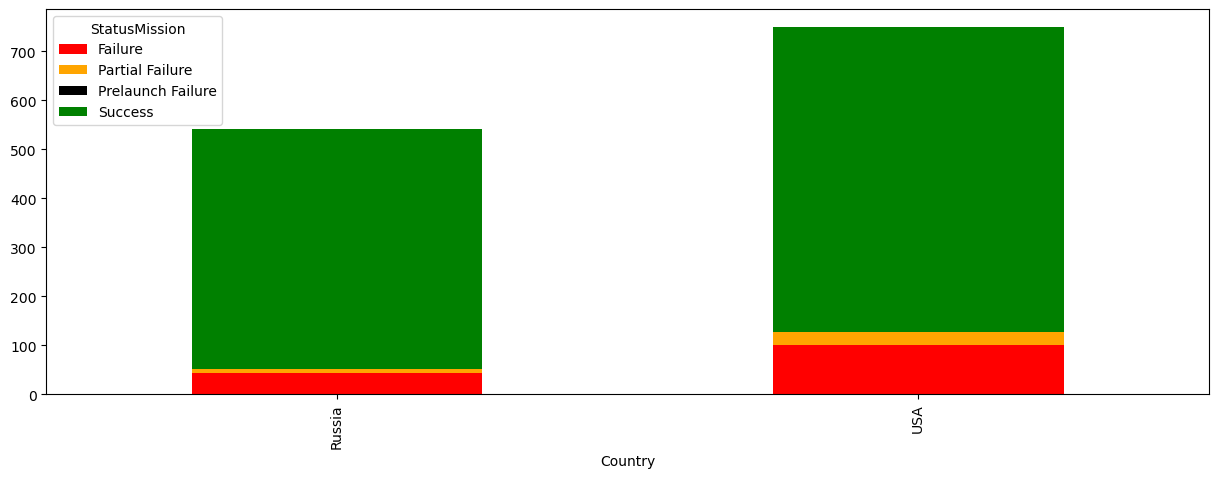

In [25]:
success_and_fail.plot(kind='bar', stacked=True, figsize=(15,5), color={'Success': 'green', "Failure": 'red', 'Partial Failure': 'orange', 'Prelaunch Failure': 'black'})

### When these mission happened?

<Axes: xlabel='Datum', ylabel='Country'>

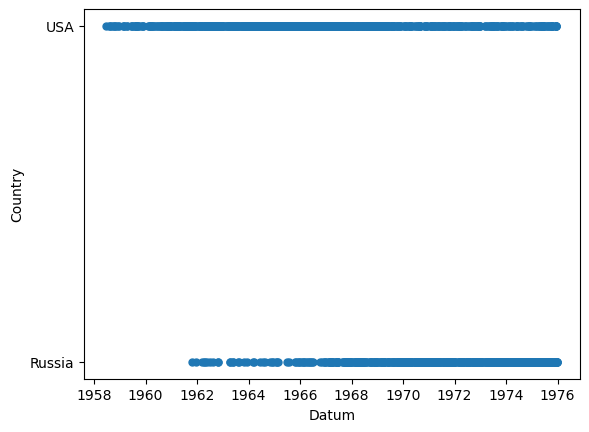

In [26]:
space_race.plot.scatter(x='Datum', y='Country', s=25)

In [27]:
missions_USA = space_race.query('Country == "USA"').Datum.dt.year.value_counts()

In [28]:
missions_Russia = space_race.query('Country == "Russia"').Datum.dt.year.value_counts()

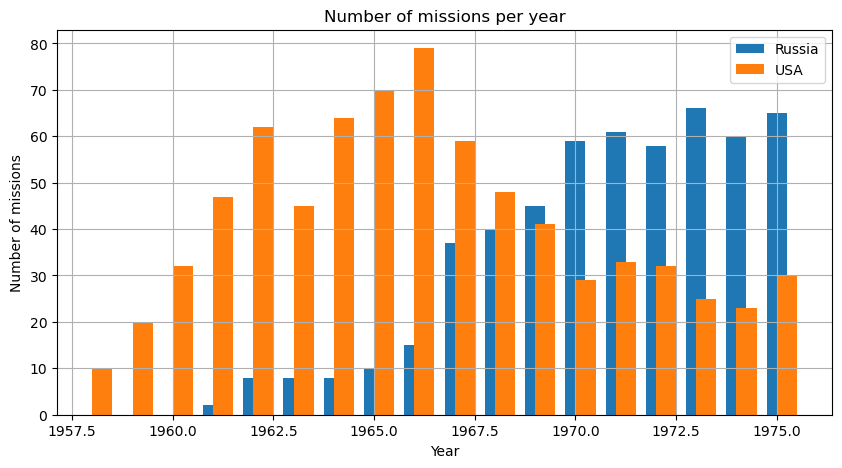

In [29]:
plt.figure(figsize=(10, 5))  # Set the size of the plot

# Plot each series
plt.bar(missions_Russia.index, missions_Russia.values, label='Russia', width=.5)  # You can customize the line style
plt.bar(missions_USA.index, missions_USA.values, label='USA', align='edge', width=.5)  # Adding another series

# Add title and labels
plt.title('Number of missions per year')
plt.xlabel('Year')
plt.ylabel('Number of missions')

# Adding a legend
plt.legend()

# Show the plot
plt.grid(True)  # Optionally add a grid
plt.show()

### Observations on Mission Continuity
- **Consistent U.S. Missions:** From what we can see, the U.S. didn’t really take breaks with their space missions.Sshowing they were really dedicated to keeping their space program active.
- **Gaps in Russian Missions:** Russia, however, had a few gaps in their mission timeline. Maybe they were rethinking their strategies or dealing with resource issues? It shows they weren’t as steady with their launches.

### Mission Frequency Changes Post-1967
- **U.S. Slows DownroundAfter 1967, there’s a noticeable dip in how often the U.S. was launching missions. It seems like they might have slowed down after achieving some of their big goals, maybe taking time to plan out their next steps.
- **Russia Steps It Up:** At the same time, Russia started launching more missions. Perhaps they were trying to catch up or get ahead, especially if they felt they were falling behind in the space race.

It’s pretty interesting to see how both countries adjusted their space programs over time, likely influenced by their successes, setbacks, and the overall space race dynamics.
namics.
obally.
actors.


### When most failures happened? At the begining or at the end?

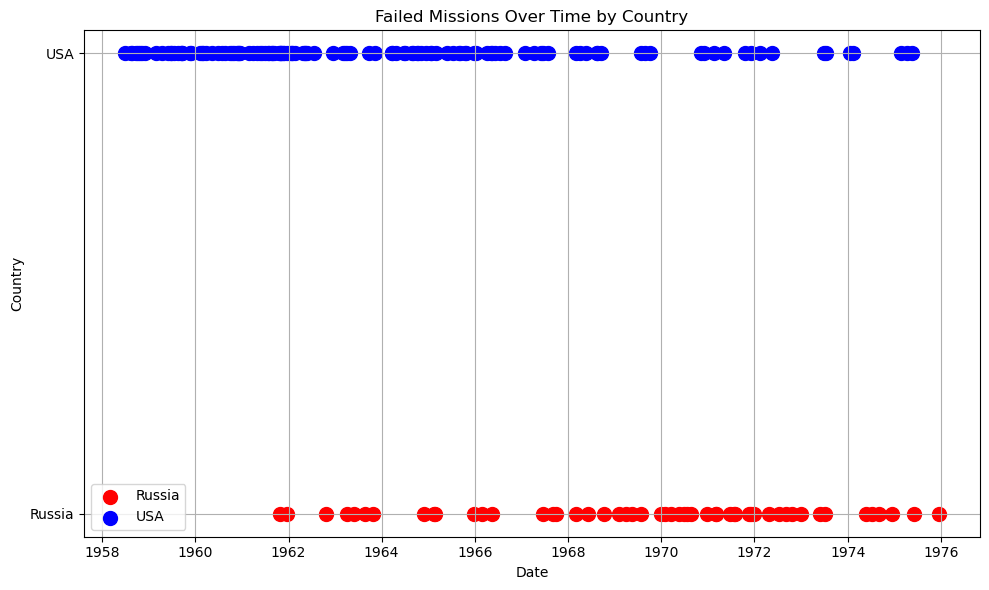

In [30]:
failed_missions = space_race[space_race['StatusMission'] != 'Success']

# Plotting the failed missions
country_colors = {'USA': 'blue', 'Russia': 'red'}

# Plotting the failed missions
plt.figure(figsize=(10, 6))
for country, group in failed_missions.groupby('Country'):
    plt.scatter(group['Datum'], [country] * len(group), color=country_colors[country], label=country, marker='o', s=100)

plt.title('Failed Missions Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Country')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'USA'}, xlabel='Year'>

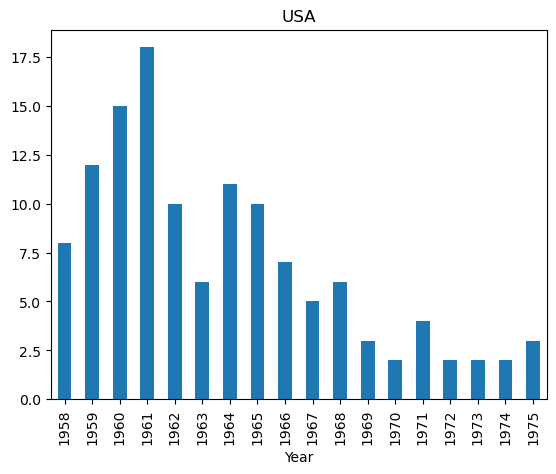

In [31]:
space_race['Year'] = space_race.Datum.dt.year
filter = space_race['Country'] == 'USA'
space_race[filter].query('StatusMission != "Success"').groupby(['Year'], observed=False)['StatusMission'].count().plot(kind='bar', title='USA')

<Axes: title={'center': 'Russia'}, xlabel='Year'>

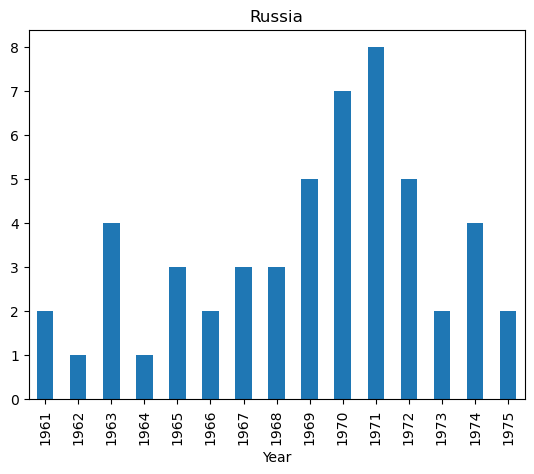

In [32]:
filter = space_race['Country'] == 'Russia'
space_race[filter].query('StatusMission != "Success"').groupby(['Year'], observed=False)['StatusMission'].count().plot(kind='bar', title='Russia')

### What about successful missions?

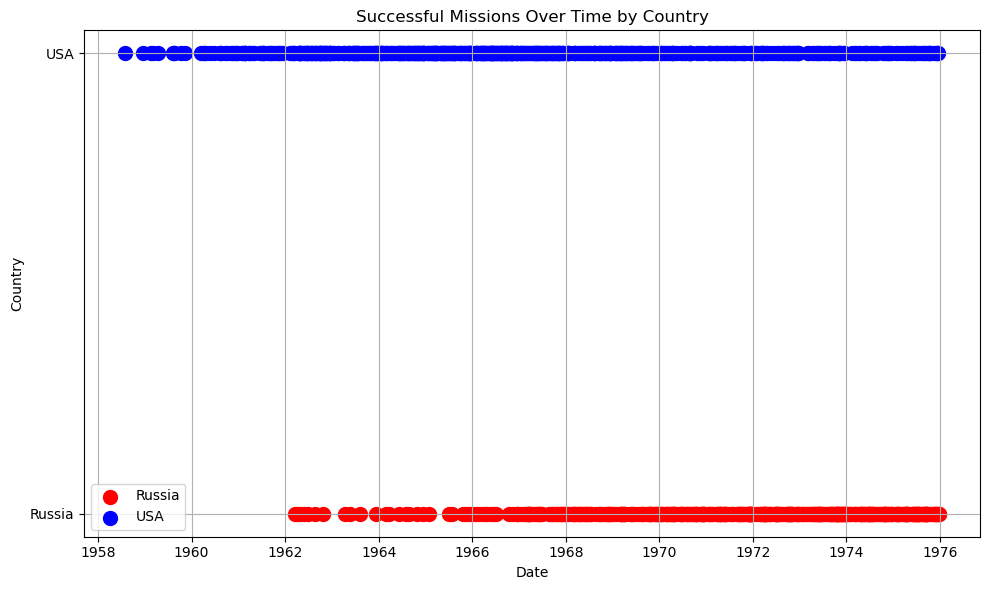

In [33]:
successful_missions = space_race[space_race['StatusMission'] == 'Success']
plt.figure(figsize=(10, 6))
for country, group in successful_missions.groupby('Country'):
    plt.scatter(group['Datum'], [country] * len(group), color=country_colors[country], label=country, marker='o', s=100)

plt.title('Successful Missions Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Country')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Russia'}, xlabel='Year'>

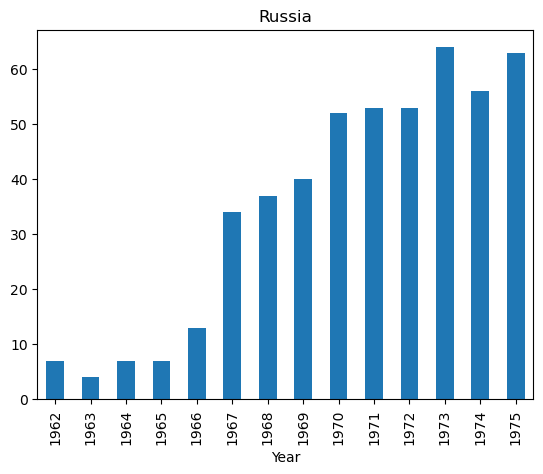

In [34]:
filter = space_race['Country'] == 'Russia'
space_race[filter].query('StatusMission == "Success"').groupby(['Year'], observed=False)['StatusMission'].count().plot(kind='bar', title='Russia')

<Axes: title={'center': 'USA'}, xlabel='Year'>

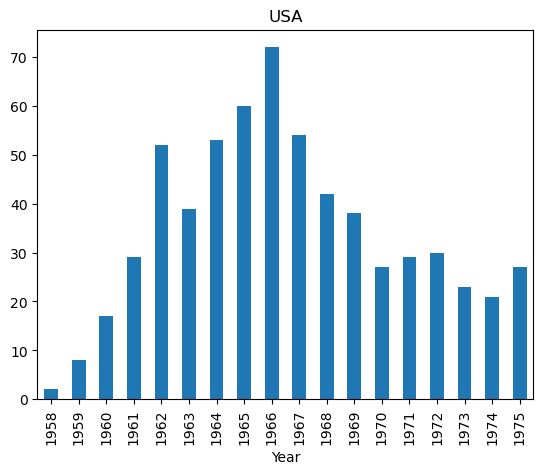

In [35]:
filter = space_race['Country'] == 'USA'
space_race[filter].query('StatusMission == "Success"').groupby(['Year'], observed=False)['StatusMission'].count().plot(kind='bar', title='USA')

### First missions:

#### USA

In [36]:
space_race.sort_values('Datum').query('Country == "Russia"').head(1)

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission,Country,Year
6621,RVSN USSR,"Mayak-2, Kapustin Yar, Russia",1961-10-27 16:30:00+00:00,NaN,DS-1 n°1,Retired,Failure,Russia,1961


#### Russia

In [37]:
space_race.sort_values('Datum').query('Country == "USA"').head(1)

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission,Country,Year
6749,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1958-06-26 05:00:00+00:00,NaN,Vanguard SLV-2,Retired,Failure,USA,1958


### What is the gap between them?

In [38]:
first_mission_russia = space_race.sort_values('Datum').query('Country == "Russia"').head(1).Datum

In [39]:
first_mission_usa = space_race.sort_values('Datum').query('Country == "USA"').head(1).Datum

In [40]:
(first_mission_russia.values[0] - first_mission_usa.values[0]).astype('timedelta64[Y]').astype(int)

3

---

## Observations:
- The USA began its space program almost four years earlier than Russia.
- During the first half of the space race, the USA experienced more failures, whereas Russia encountered more failures during the second half.
- Russia had intermittent breaks in its missions during the first half of the race, while the USA consistently launched new missions.
- OveraUSAssia executed more missions than Russia USA.
- Both country's first missions wereia falure

- Russslower start with less failures than USAs.
lure


---

## How much each country had spent?
### (Data is incomplete so it will not tell us much)

In [41]:
price = space_race.groupby('Country')['Price'].sum()

Text(0, 0.5, '$million')

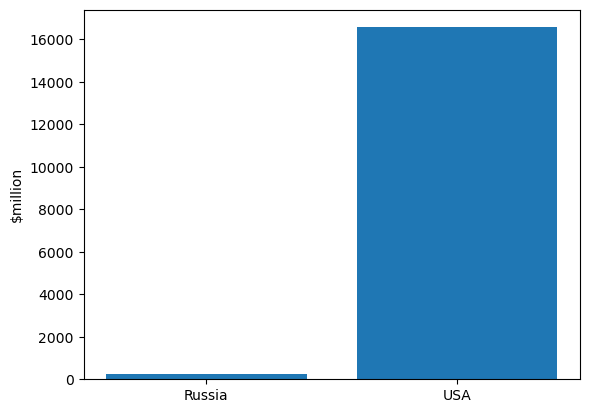

In [42]:
plt.bar(x=price.index, height=price)
plt.ylabel('$million')

### We can see that USA documented more than 16000 millions 
### And data about Russia investmend is rather incomplete showing us less than 1000 millions 
---

### How many rockets are still active?

In [43]:
space_race.StatusRocket.value_counts()

StatusRocket
 Retired    1291
 Active        0
Name: count, dtype: int64

---

### How many rockets took part in race?

In [44]:
space_race['Rocket'].duplicated().any()

True

In [45]:
space_race.query('Country == "Russia"')['Rocket'].duplicated().any()

True

### Russia used same rocket twice

In [46]:
filter = space_race.query('Country == "Russia"')['Rocket'].duplicated()
space_race.query('Country == "Russia"')[filter]

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission,Country,Year
5639,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia",1970-06-27 16:39:00+00:00,NaN,Strela-2M satellite,Retired,Failure,Russia,1970


In [47]:
space_race.query('Rocket == "Strela-2M satellite"')

,CompanyName,Location,Datum,Price,Rocket,StatusRocket,StatusMission,Country,Year
5345,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia",1972-10-17 19:59:00+00:00,NaN,Strela-2M satellite,Retired,Failure,Russia,1972
5639,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia",1970-06-27 16:39:00+00:00,NaN,Strela-2M satellite,Retired,Failure,Russia,1970


### Missions of this rocket were 2 years apart

In [48]:
space_race.query('Country == "USA"')['Rocket'].duplicated().any()

False

In [49]:
space_race.drop_duplicates(['Rocket']).groupby('Country').size()

Country
Russia    541
USA       749
dtype: int64

### The USA launched over 700 rockets, while Russia launched fewer than 600.
### This  proves that the 'Price' data is corrupted..